<a href="https://colab.research.google.com/github/PranavKumarAV/Fire-Detection/blob/main/DL_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required libraries
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# Importing the file from my google drive
!gdown --id 1hWZmR9Wkbm5_DijpzUp8mDmCn1nK-qfi

Downloading...
From: https://drive.google.com/uc?id=1hWZmR9Wkbm5_DijpzUp8mDmCn1nK-qfi
To: /content/Fire_Detection_Dataset.zip
497MB [00:03, 147MB/s]


In [ ]:
# Unzipping the Imported file
!unzip Fire_Detection_Dataset.zip

Archive:  Fire_Detection_Dataset.zip
   creating: Fire_Detection_Dataset/
  inflating: Fire_Detection_Dataset/.DS_Store  
  inflating: __MACOSX/Fire_Detection_Dataset/._.DS_Store  
   creating: Fire_Detection_Dataset/Test/
   creating: Fire_Detection_Dataset/Train/
  inflating: Fire_Detection_Dataset/Test/.DS_Store  
  inflating: __MACOSX/Fire_Detection_Dataset/Test/._.DS_Store  
   creating: Fire_Detection_Dataset/Test/Fire/
   creating: Fire_Detection_Dataset/Test/No_Fire/
  inflating: Fire_Detection_Dataset/Train/.DS_Store  
  inflating: __MACOSX/Fire_Detection_Dataset/Train/._.DS_Store  
   creating: Fire_Detection_Dataset/Train/Fire/
  inflating: __MACOSX/Fire_Detection_Dataset/Train/._Fire  
   creating: Fire_Detection_Dataset/Train/No_Fire/
  inflating: __MACOSX/Fire_Detection_Dataset/Train/._No_Fire  
  inflating: Fire_Detection_Dataset/Test/Fire/image_193.jpg  
  inflating: __MACOSX/Fire_Detection_Dataset/Test/Fire/._image_193.jpg  
  inflating: Fire_Detection_Dataset/Test/Fir

In [ ]:
TRAINING_DIR = "/content/Fire_Detection_Dataset/Train"
VALIDATION_DIR = "/content/Fire_Detection_Dataset/Test"

In [ ]:
# Calculating the length of Training and Validation dir
print(len(os.listdir(TRAINING_DIR+"/Fire")))
print(len(os.listdir(TRAINING_DIR+"/No_Fire")))
print(len(os.listdir(VALIDATION_DIR+"/Fire")))
print(len(os.listdir(VALIDATION_DIR+"/No_Fire")))

701
701
301
301


In [ ]:
# Creating the model
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),                                  # Using Adam optimization
metrics=['acc'])

In [ ]:
model.summary()                           # Printing the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0

In [ ]:
# Data Augmentation
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 64)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# Creating checkpoint to save the best model
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Creating Callback funtion and saving only the best model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    verbose=1)

In [ ]:
# Training the model
history = model.fit(
train_generator,
steps_per_epoch = 15,
epochs = 25,
validation_data = validation_generator,
validation_steps = 15,
callbacks=[model_checkpoint_callback])

Epoch 1/25
15/15 [==============================] - 245s 16s/step - loss: 0.6690 - acc: 0.5940 - val_loss: 0.5494 - val_acc: 0.7958

Epoch 00001: val_acc improved from -inf to 0.79583, saving model to training_1/cp.ckpt
Epoch 2/25
15/15 [==============================] - 247s 16s/step - loss: 0.5105 - acc: 0.7554 - val_loss: 0.4962 - val_acc: 0.7333

Epoch 00002: val_acc did not improve from 0.79583
Epoch 3/25
15/15 [==============================] - 243s 16s/step - loss: 0.4126 - acc: 0.8230 - val_loss: 0.4805 - val_acc: 0.7875

Epoch 00003: val_acc did not improve from 0.79583
Epoch 4/25
15/15 [==============================] - 242s 16s/step - loss: 0.4051 - acc: 0.8253 - val_loss: 0.4244 - val_acc: 0.8000

Epoch 00004: val_acc improved from 0.79583 to 0.80000, saving model to training_1/cp.ckpt
Epoch 5/25
15/15 [==============================] - 250s 17s/step - loss: 0.3694 - acc: 0.8518 - val_loss: 0.4325 - val_acc: 0.8000

Epoch 00005: val_acc did not improve from 0.80000
Epoch 6/

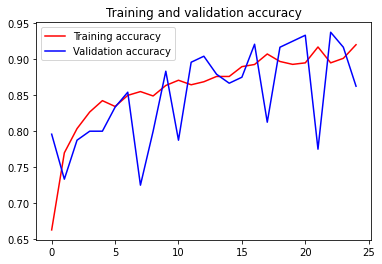

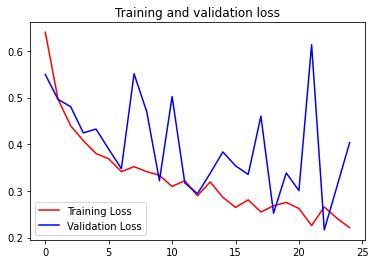

In [ ]:
#Plotting the graphs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Importing Images from Laptop to detect the image by our model
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  if classes[0][0]>0.5:
    print(fn + " Fire")
  else:
    print(fn + " No Fire")

Saving Non_Fire_pic.jpeg to Non_Fire_pic (1).jpeg
[[0. 1.]]
Non_Fire_pic.jpeg No Fire


In [ ]:
# Saving the weights in our Laptop
model.save("Fire_Detection_Weights.h5")
print("Saved model to disk")

Saved model to disk
